In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('C:\\Users\\User\\Desktop\\Datasets\\Churn_Modelling.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

In [5]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
df.isnull().sum()

CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df.shape

(10000, 11)

In [8]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [9]:
y.value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [10]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

In [11]:
X = pd.get_dummies(X, columns = ['Geography', 'Gender'], drop_first=True, dtype='int')

In [12]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0


In [13]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3, stratify=y, random_state=0)

In [14]:
from sklearn.preprocessing import StandardScaler

In [15]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [22]:
from tensorflow import keras

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

In [24]:
classifier = Sequential()

In [25]:
classifier.add(Dense(units=10, kernel_initializer = 'he_normal', activation='relu', input_dim=11))
classifier.add(Dropout(0.3))
classifier.add(Dense(units=20, kernel_initializer = 'he_normal', activation='relu'))
classifier.add(Dropout(0.4))
classifier.add(Dense(units=15, kernel_initializer = 'he_normal', activation='relu'))
classifier.add(Dropout(0.2))

In [26]:
classifier.add(Dense(units=1, kernel_initializer = 'glorot_uniform', activation='sigmoid'))

In [27]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [39]:
model_history = classifier.fit(X_train, y_train, validation_split=0.2, batch_size=50, epochs=100)

Epoch 1/100


112/112 [==============================] - 2s 5ms/step - loss: 0.7041 - accuracy: 0.6855 - val_loss: 0.4814 - val_accuracy: 0.8179
Epoch 2/100
112/112 [==============================] - 0s 4ms/step - loss: 0.5882 - accuracy: 0.7511 - val_loss: 0.4768 - val_accuracy: 0.8179
Epoch 3/100
112/112 [==============================] - 0s 4ms/step - loss: 0.5593 - accuracy: 0.7682 - val_loss: 0.4724 - val_accuracy: 0.8179
Epoch 4/100
112/112 [==============================] - 0s 4ms/step - loss: 0.5263 - accuracy: 0.7788 - val_loss: 0.4668 - val_accuracy: 0.8179
Epoch 5/100
112/112 [==============================] - 0s 3ms/step - loss: 0.5171 - accuracy: 0.7843 - val_loss: 0.4604 - val_accuracy: 0.8179
Epoch 6/100
112/112 [==============================] - 1s 5ms/step - loss: 0.5111 - accuracy: 0.7837 - val_loss: 0.4609 - val_accuracy: 0.8179
Epoch 7/100
112/112 [==============================] - 0s 4ms/step - loss: 0.4958 - accuracy: 0.7877 - val_loss: 0.4496 - val_accuracy: 0.81

Epoch 55/100
112/112 [==============================] - 0s 4ms/step - loss: 0.3987 - accuracy: 0.8343 - val_loss: 0.3492 - val_accuracy: 0.8657
Epoch 56/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3933 - accuracy: 0.8375 - val_loss: 0.3476 - val_accuracy: 0.8664
Epoch 57/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3934 - accuracy: 0.8321 - val_loss: 0.3479 - val_accuracy: 0.8657
Epoch 58/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3953 - accuracy: 0.8363 - val_loss: 0.3466 - val_accuracy: 0.8657
Epoch 59/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3969 - accuracy: 0.8288 - val_loss: 0.3464 - val_accuracy: 0.8679
Epoch 60/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3974 - accuracy: 0.8345 - val_loss: 0.3484 - val_accuracy: 0.8650
Epoch 61/100
112/112 [==============================] - 0s 3ms/step - loss: 0.3931 - accuracy: 0.8339 - val_loss: 0.3458 - val_accuracy:

In [40]:
classifier.evaluate(X_test,y_test)

94/94 [==============================] - 0s 2ms/step - loss: 0.3716 - accuracy: 0.8437


[0.3715527355670929, 0.843666672706604]

In [41]:
y_pred = classifier.predict(X_test)

94/94 [==============================] - 0s 1ms/step


In [42]:
y_pred[:5]

array([[0.12476617],
       [0.4081246 ],
       [0.35436463],
       [0.08447116],
       [0.05120019]], dtype=float32)

In [43]:
y_test[:5]

3714    0
7308    1
7156    0
2572    0
2711    0
Name: Exited, dtype: int64

In [44]:
y_pred_f = []

for x in y_pred:
    if x>0.5:
        y_pred_f.append(1)
    else:
        y_pred_f.append(0)

In [45]:
y_pred_f[5:15]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [46]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, f1_score

print(accuracy_score(y_test,y_pred_f))
print()
print(f1_score(y_test,y_pred_f))

0.8436666666666667

0.4383233532934132


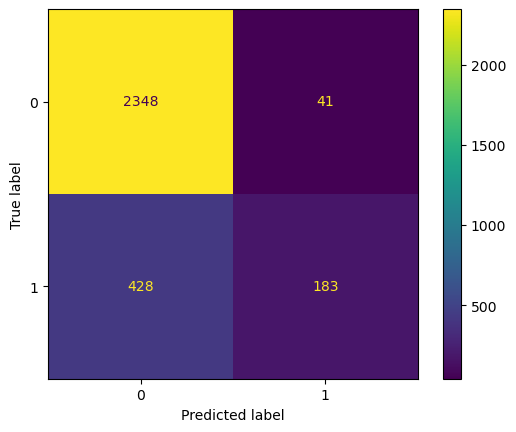

In [47]:
ConfusionMatrixDisplay.from_predictions(y_test,y_pred_f)

In [48]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_pred_f))

              precision    recall  f1-score   support

           0       0.85      0.98      0.91      2389
           1       0.82      0.30      0.44       611

    accuracy                           0.84      3000
   macro avg       0.83      0.64      0.67      3000
weighted avg       0.84      0.84      0.81      3000



## Handling Imbalanced data

In [10]:
pip install --upgrade imblearn

Note: you may need to restart the kernel to use updated packages.


In [14]:
from imblearn.combine import SMOTETomek

In [15]:
X.shape, y.shape

((10000, 11), (10000,))

In [16]:
sm = SMOTETomek(random_state=0)

X_o, y_o = sm.fit_resample(X,y)

In [17]:
X_o.shape, y_o.shape

((13664, 11), (13664,))

In [18]:
y_o.value_counts()

Exited
0    6832
1    6832
Name: count, dtype: int64

In [19]:
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X_o, y_o, test_size=0.3, random_state=0)

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_o = scaler.fit_transform(X_train_o)
X_test_o = scaler.transform(X_test_o)

In [30]:
model_history1 = classifier.fit(X_train_o, y_train_o, validation_split=0.2, batch_size=50, epochs=100)

Epoch 1/100
154/154 [==============================] - 1s 4ms/step - loss: 0.6749 - accuracy: 0.5778 - val_loss: 0.6115 - val_accuracy: 0.7449
Epoch 2/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6294 - accuracy: 0.6895 - val_loss: 0.5709 - val_accuracy: 0.7695
Epoch 3/100
154/154 [==============================] - 0s 3ms/step - loss: 0.6071 - accuracy: 0.7047 - val_loss: 0.5507 - val_accuracy: 0.7852
Epoch 4/100
154/154 [==============================] - 0s 3ms/step - loss: 0.5915 - accuracy: 0.7203 - val_loss: 0.5347 - val_accuracy: 0.7883
Epoch 5/100
154/154 [==============================] - 0s 3ms/step - loss: 0.5865 - accuracy: 0.7155 - val_loss: 0.5223 - val_accuracy: 0.7972
Epoch 6/100
154/154 [==============================] - 0s 3ms/step - loss: 0.5753 - accuracy: 0.7304 - val_loss: 0.5133 - val_accuracy: 0.7951
Epoch 7/100
154/154 [==============================] - 0s 3ms/step - loss: 0.5622 - accuracy: 0.7336 - val_loss: 0.5044 - val_accuracy: 0.7956

Epoch 58/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4581 - accuracy: 0.7934 - val_loss: 0.4183 - val_accuracy: 0.8139
Epoch 59/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4562 - accuracy: 0.7999 - val_loss: 0.4220 - val_accuracy: 0.8108
Epoch 60/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4555 - accuracy: 0.7957 - val_loss: 0.4205 - val_accuracy: 0.8150
Epoch 61/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4531 - accuracy: 0.7961 - val_loss: 0.4188 - val_accuracy: 0.8118
Epoch 62/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4629 - accuracy: 0.7939 - val_loss: 0.4218 - val_accuracy: 0.8097
Epoch 63/100
154/154 [==============================] - 0s 3ms/step - loss: 0.4571 - accuracy: 0.7941 - val_loss: 0.4187 - val_accuracy: 0.8092
Epoch 64/100
154/154 [==============================] - 0s 2ms/step - loss: 0.4606 - accuracy: 0.7960 - val_loss: 0.4183 - val_accuracy:

In [32]:
classifier.evaluate(X_test_o, y_test_o)

129/129 [==============================] - 0s 2ms/step - loss: 0.4165 - accuracy: 0.8154


[0.4164990186691284, 0.8153658509254456]

In [33]:
y_pred_o = classifier.predict(X_test_o)

129/129 [==============================] - 0s 1ms/step


In [34]:
y_pred_o[:5]

array([[0.3982851 ],
       [0.8727771 ],
       [0.94803196],
       [0.7555784 ],
       [0.784022  ]], dtype=float32)

In [35]:
y_predf_o = []

for i in y_pred_o:
    if i>0.5:
        y_predf_o.append(1)
    else:
        y_predf_o.append(0)

In [36]:
y_predf_o[:5]

[0, 1, 1, 1, 1]

In [37]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, f1_score, classification_report

In [39]:
print(accuracy_score(y_test_o,y_predf_o))
print()
print(f1_score(y_test_o,y_predf_o))

0.8153658536585365

0.8239944199023482


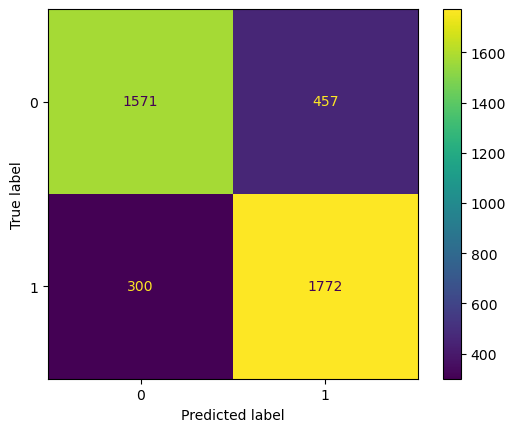

In [41]:
ConfusionMatrixDisplay.from_predictions(y_test_o, y_predf_o)

In [40]:
print(classification_report(y_test_o, y_predf_o))

              precision    recall  f1-score   support

           0       0.84      0.77      0.81      2028
           1       0.79      0.86      0.82      2072

    accuracy                           0.82      4100
   macro avg       0.82      0.81      0.81      4100
weighted avg       0.82      0.82      0.82      4100



#### We note that after handling the imbalance in the dataset using SMOTETomek, the f1-score has improved from 0.43 to 0.82!